## About Dataset
### Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

### Content
Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

### Acknowledgements
The dataset is available on GitHub here.

### Inspiration
Can you accurately predict insurance costs

In [109]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
len(df)

1338

In [4]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Genders are evenly distributed

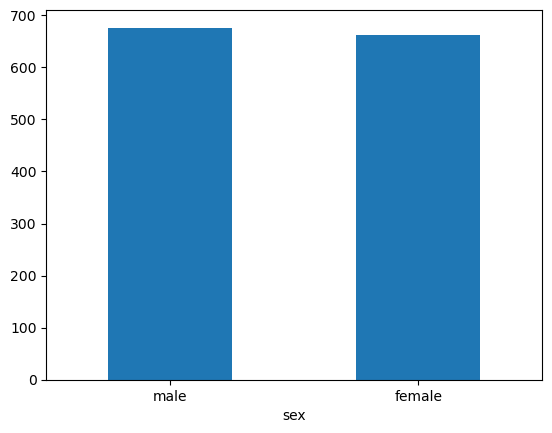

In [11]:
df.sex.value_counts().plot(kind="bar")
plt.xticks(rotation=0);

There are less smoking females than males.

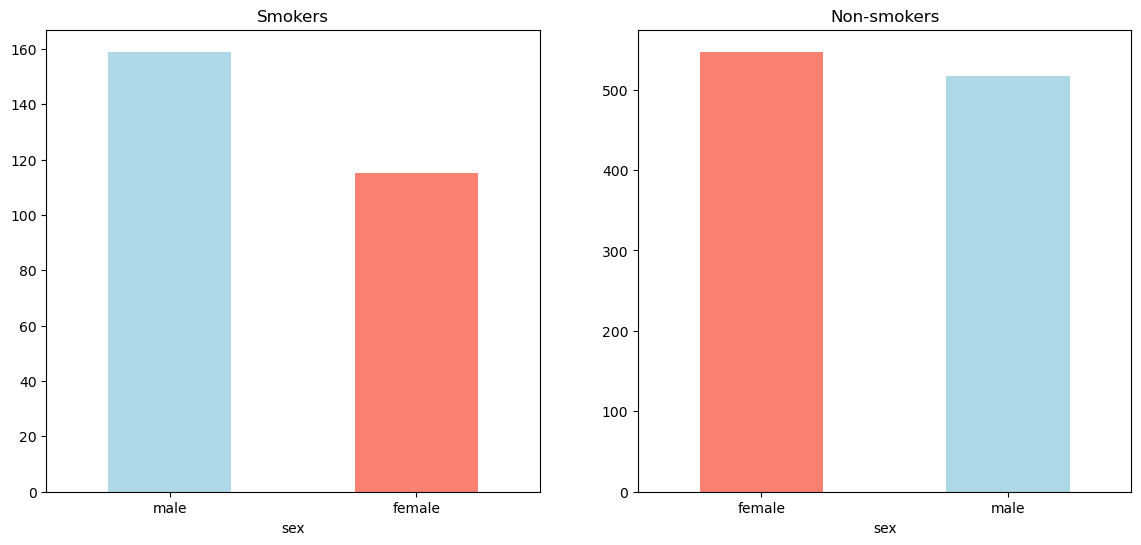

In [53]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
df.sex[df.smoker=="yes"].value_counts().plot(kind="bar", ax=ax1, title="Smokers", color=["lightblue", "salmon"])
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

df.sex[df.smoker=="no"].value_counts().plot(kind="bar", ax=ax2, title="Non-smokers", color=["salmon", "lightblue"])
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0);

Lets look at age and bmi

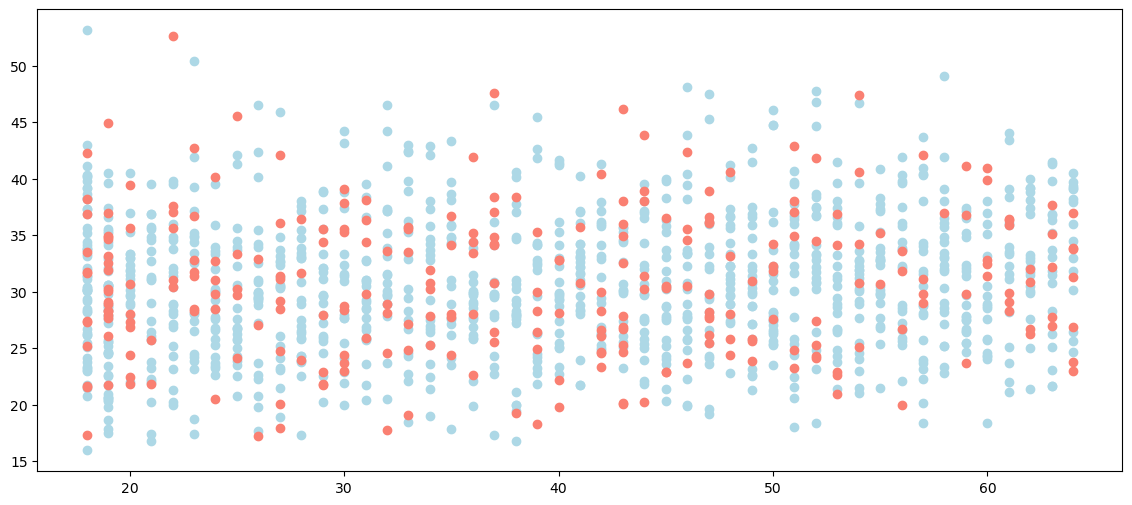

In [66]:
plt.figure(figsize=(14, 6))
plt.scatter(df.age[df.smoker=="no"], df.bmi[df.smoker=="no"], color="lightblue");
plt.scatter(df.age[df.smoker=="yes"], df.bmi[df.smoker=="yes"], color="salmon");

What about smokers and charges compared to non smokers

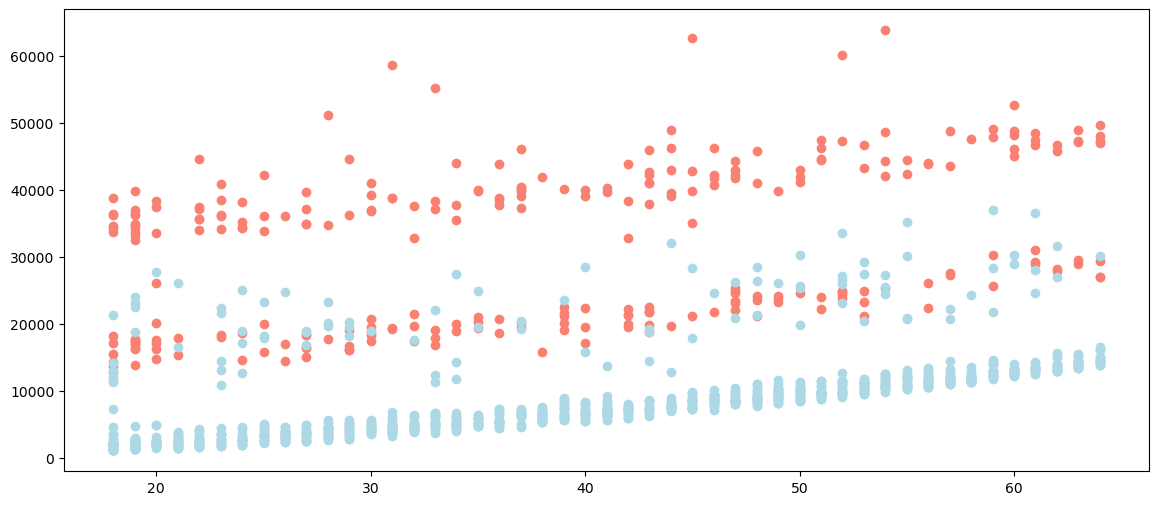

In [71]:
plt.figure(figsize=(14, 6))
plt.scatter(df.age[df.smoker=="yes"], df.charges[df.smoker=="yes"], color="salmon")
plt.scatter(df.age[df.smoker=="no"], df.charges[df.smoker=="no"], color="lightblue");

I can see that smokers get charged more.

Do you also get charged more if you have a higher bmi?

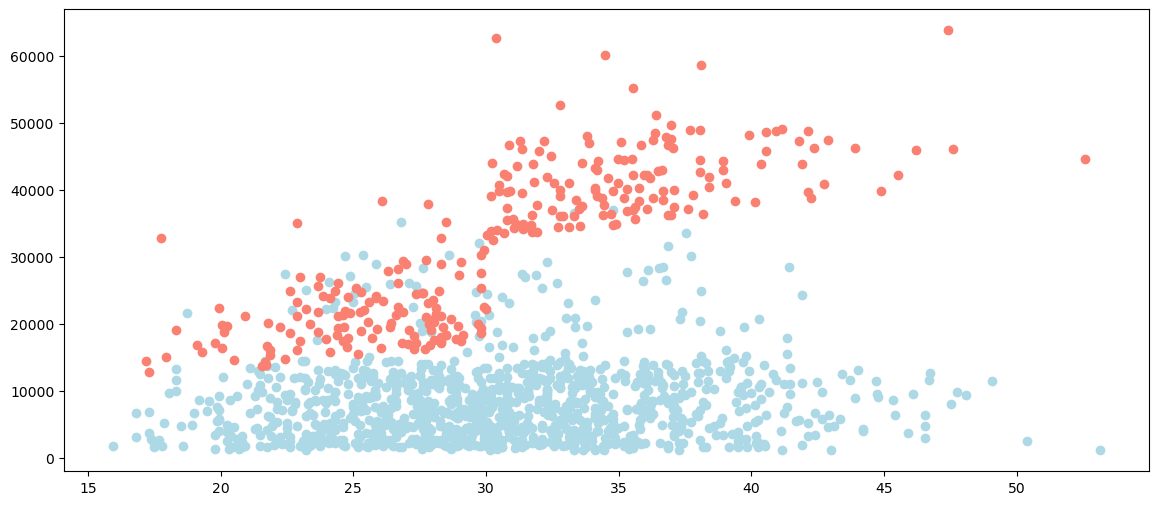

In [77]:
plt.figure(figsize=(14, 6))
plt.scatter(df.bmi[df.smoker=="no"], df.charges[df.smoker=="no"], color="lightblue")
plt.scatter(df.bmi[df.smoker=="yes"], df.charges[df.smoker=="yes"], color="salmon");

In [83]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [84]:
encoder = LabelEncoder()

df["smoker"] = encoder.fit_transform(df["smoker"])
df["sex"] = encoder.fit_transform(df["sex"])
df["region"] = encoder.fit_transform(df["region"])

In [101]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


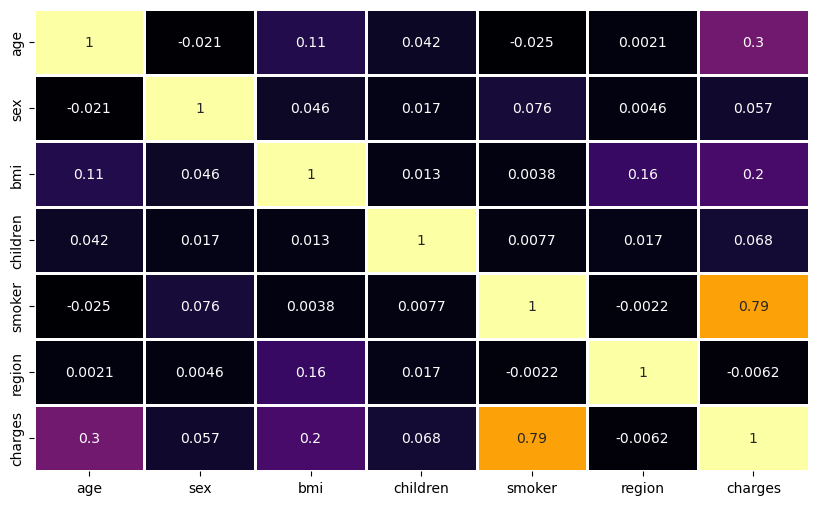

In [100]:
plt.figure(figsize=(10, 6))
sn.heatmap(df.corr(), annot=True, cbar=False, linewidths=0.9, cmap="inferno");

The biggest correlation to charges is if the person is a smoker or not.

Time to create a model

In [106]:
X = df.drop("charges", axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
regr = LinearRegression(n_jobs=-1).fit(X_train, y_train)
regr.score(X_test, y_test)

0.7507582669269899

Can I get the score better using GridSearchCV

In [112]:
hyperparameters = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, -1]
}

gs_regr = GridSearchCV(regr, hyperparameters, n_jobs=-1, cv=5).fit(X_train, y_train)
gs_regr.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [113]:
gs_regr.score(X_test, y_test)

0.7507582669269899

It  didn't make a difference so we can just stick to our normal regr

In [117]:
features_importance = dict(zip(df.columns, list(regr.coef_)))
features_importance

{'age': 253.39344062080022,
 'sex': -201.0269768149423,
 'bmi': 333.59016015583603,
 'children': 576.0452348355465,
 'smoker': 23610.06130203559,
 'region': -440.06408279544}

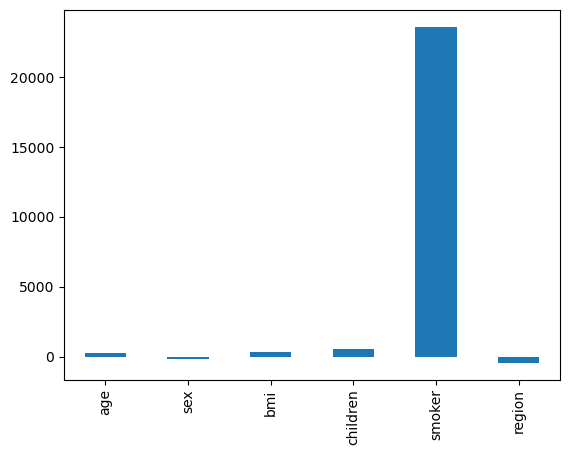

In [120]:
features_importance_df = pd.DataFrame(features_importance, index=[0])
features_importance_df.T.plot(kind="bar", legend=False);